In [41]:
import numpy as np
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt
import time as tm

Question 1: Time Domain Convolution

Write a python function y = myTimeConv(x,h) that computes the sample by sample time domain convolution of two signals. 'x' and 'h' are the signal and impulse response respectively and must be NumPy arrays. 'y' is the convolution output and also must be a NumPy array (single channel signals only).  [15]
If the length of 'x' is 200 and the length of 'h' is 100, what is the length of 'y' ? It is sufficient to only provide the answer in a comment above the convolution implementation. [5]
In your main script define 'x' as a DC signal of length 200 (constant amplitude of 1) and 'h' as a symmetric triangular signal of length 51 (0 at the first and last sample and 1 in the middle). Add a function call to myTimeConv() in your script to compute 'y_time' as the time-domain convolution of 'x' and 'h' as defined above. Plot the result (label the axes appropriately) and save in the results folder [10]

In [65]:
#x=signal, h=impulse response
def myTimeConv(x,h):
    #length of convolution
    y=np.zeros(len(x)+len(h)-1)
    #pad signals with zeros
    x0=np.append(x,np.zeros(len(h)-1))
    h0=np.append(h,np.zeros(len(x)-1))
    #print(len(y))
    for n in range(0,len(y)-1):
        #print(n)
        for m in range(0,len(h)-1):
            y[n]+=x0[n-m]*h0[m]
    return y

If the length of 'x' is 200 and the length of 'h' is 100, the length of 'y' is 299.

In [3]:
def main():
    #x=signal of length 200, constant amplitude of 1
    x=np.ones(200)
    #h=symmetric triangular signal of length 51 (0 at first and last sample, 1 in the middle)
    h1=np.linspace(0,1,26)
    h2=np.flip(h1)
    h=np.append(h1,h2[1:])
    y_time = myTimeConv(x,h)
    return x, h, y_time

In [57]:
x, h, y_time=main()
print(len(x))
print(len(h))
print(len(y_time))

200
51
250


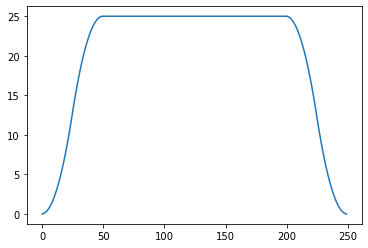

In [58]:
plt.plot(y_time)

Question 2. Compare with SciPy Implementation
In this part, you will compare your implementation with the built-in SciPy convolve() (https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html (Links to an external site.)) method. 

Write a function (m, mabs, stdev, time) = CompareConv(x, h) that compares the output of the convolution from both myTimeConv() with the built-in SciPy convolve() function. Again, 'x' and 'h' are the signal and impulse response respectively and must be NumPy arrays. The function should compute the convolution result of myTimeConv() and compare it with that of convolve(). It must return the following parameters: [10]
a) m: float of the mean difference of the output compared to convolve()
b) mabs: float of the mean absolute difference of the output compared to convolve()
c) stdev: float standard deviation of the difference of the output compared to convolve() 
d) time: 2-lengthed array containing the running time of each method. (reminder: you will not be graded on speed results)

In [19]:
def loadSoundFile(filename):
    samplerate, data = wavfile.read('./'+filename)
    #if there is more than one channel, keep the left
    if data.ndim>1:
        L = data[:,0]
    else:
        L=data
    #scale to [-1,1]
    x = L/max(L)
    return x
    return data

In [20]:
impulse=loadSoundFile('impulse-response.wav')
piano=loadSoundFile('piano.wav')

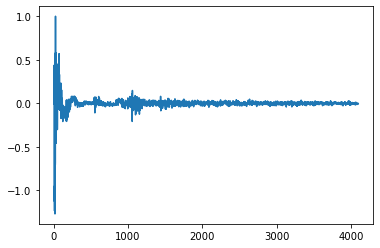

In [78]:
plt.plot(impulse)

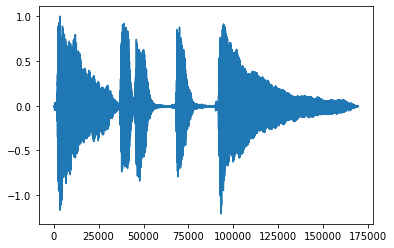

In [79]:
plt.plot(piano)

In [82]:
test=signal.convolve(impulse, piano, mode='full')

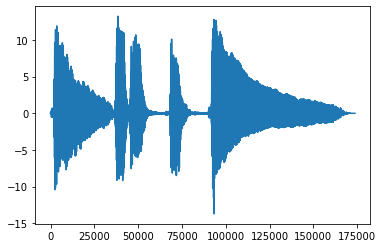

In [83]:
plt.plot(test)

In [84]:
print(len(piano))
print(len(impulse))
print(len(test))

169600
4096
173695


<class 'numpy.ndarray'>
200
51
250


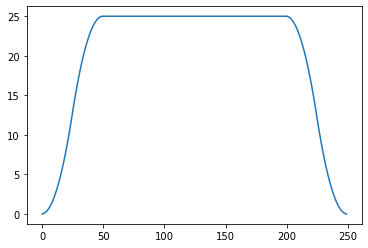

In [11]:
x=np.ones(200)
    #h=symmetric triangular signal of length 51 (0 at first and last sample, 1 in the middle)
h1=np.linspace(0,1,26)
h2=np.flip(h1)
h=np.append(h1,h2[1:])
test2=signal.convolve(x,h)
plt.plot(test2)
print(type(test2))
print(len(x))
print(len(h))
print(len(test2))

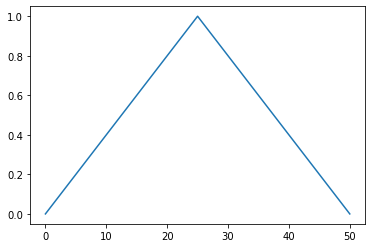

In [8]:
plt.plot(h)


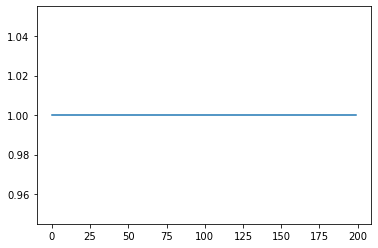

In [9]:
plt.plot(x)

In [52]:
def CompareConv(x, h):
    myStart = tm.perf_counter()
    my_conv = myTimeConv(x,h)
    plt.plot(my_conv)
    plt.title('Convolution of impulse and piano: myTimeConv')
    myEnd = tm.perf_counter()
    myTime = myEnd-myStart
    
    #timeit.timeit(myTimeConv(x,h))
    
    spStart = tm.perf_counter()
    sp_conv = signal.convolve(x,h)
    spEnd = tm.perf_counter()
    spTime = spEnd-spStart
    
    # time: 2-lengthed array containing the running time of each method. (reminder: you will not be graded on speed results)
    time = np.array([myTime,spTime])
    
    diff = my_conv - sp_conv
    #m: float of the mean difference of the output compared to convolve() 
    m = np.mean(diff)
    # mabs: float of the mean absolute difference of the output compared to convolve()
    mabs = np.mean(abs(diff))          
    # stdev: float standard deviation of the difference of the output compared to convolve()
    stdev = np.std(diff)
  
    return m, mabs, stdev, time

In [ ]:
m, mabs, stdev, time = CompareConv(piano,impulse)

In [61]:
m

-6.107472986238848e-06

In [62]:
mabs

9.012183073454666e-05

In [63]:
stdev

0.00014913360619662648

In [64]:
time

array([5.86967999e+02, 3.12114000e-02])